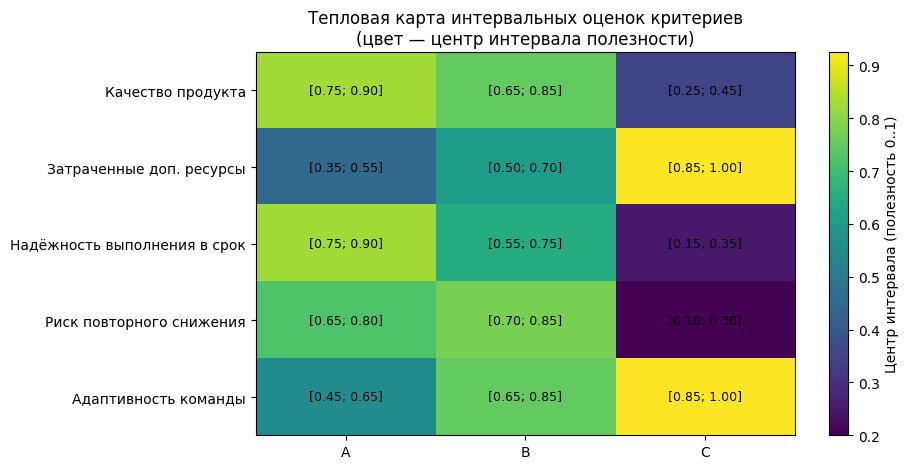

,A,B,C
Качество продукта,[0.75; 0.90],[0.65; 0.85],[0.25; 0.45]
Затраченные доп. ресурсы,[0.35; 0.55],[0.50; 0.70],[0.85; 1.00]
Надёжность выполнения в срок,[0.75; 0.90],[0.55; 0.75],[0.15; 0.35]
Риск повторного снижения,[0.65; 0.80],[0.70; 0.85],[0.10; 0.30]
Адаптивность команды,[0.45; 0.65],[0.65; 0.85],[0.85; 1.00]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Альтернативы и критерии
alts = ["A", "B", "C"]
criteria = [
    "Качество продукта",
    "Затраченные доп. ресурсы",
    "Надёжность выполнения в срок",
    "Риск повторного снижения",
    "Адаптивность команды",
]

# Интервальные оценки в шкале полезности [0,1]
# Для критериев "меньше — лучше" интервал уже инвертирован
intervals = {
    "A": [
        (0.75, 0.90),  # качество
        (0.35, 0.55),  # ресурсы
        (0.75, 0.90),  # сроки
        (0.65, 0.80),  # риск
        (0.45, 0.65),  # адаптивность
    ],
    "B": [
        (0.65, 0.85),
        (0.50, 0.70),
        (0.55, 0.75),
        (0.70, 0.85),
        (0.65, 0.85),
    ],
    "C": [
        (0.25, 0.45),
        (0.85, 1.00),
        (0.15, 0.35),
        (0.10, 0.30),
        (0.85, 1.00),
    ],
}

# Формируем матрицы нижних, верхних и центральных значений
L = np.array([[intervals[a][i][0] for a in alts] for i in range(len(criteria))])
U = np.array([[intervals[a][i][1] for a in alts] for i in range(len(criteria))])
M = (L + U) / 2.0  # центр интервала (COA)

# Построение тепловой карты
fig, ax = plt.subplots(figsize=(9.5, 4.8))
im = ax.imshow(M, aspect="auto")

ax.set_xticks(np.arange(len(alts)))
ax.set_xticklabels(alts)
ax.set_yticks(np.arange(len(criteria)))
ax.set_yticklabels(criteria)

# Подписи интервалов в ячейках
for i in range(len(criteria)):
    for j in range(len(alts)):
        ax.text(
            j, i,
            f"[{L[i,j]:.2f}; {U[i,j]:.2f}]",
            ha="center", va="center", fontsize=9
        )

ax.set_title("Тепловая карта интервальных оценок критериев\n(цвет — центр интервала полезности)")
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Центр интервала (полезность 0..1)")

plt.tight_layout()
plt.show()

# Табличное представление (для отчёта)
df = pd.DataFrame(
    {a: [f"[{intervals[a][i][0]:.2f}; {intervals[a][i][1]:.2f}]"
         for i in range(len(criteria))] for a in alts},
    index=criteria
)
df
